In [ ]:
#This source code is based on the regression program made in tutorial on Feb 3 2022 in BMEN 415
#Submitted by: Juan Cepeda
#BMEN 415 - Sensor Systems and Data Analytics
#Regression Models:

# 1. Linear Regression
# 2. Decission Tree
# 3. Kernel Ridge Regression
#Import Section:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import *
from sklearn.metrics import mean_squared_error as mse
from math import sqrt

from sklearn.linear_model import LinearRegression
from sklearn.kernel_ridge import KernelRidge
from sklearn import tree # less complex model
from sklearn import linear_model


In [ ]:
data = pd.read_csv('/content/Volumetric_features.csv')
df = data[['Left-Lateral-Ventricle',	'Left-Inf-Lat-Vent',	'Left-Cerebellum-White-Matter',	'Left-Cerebellum-Cortex',	'Left-Thalamus',	'Left-Caudate',	'Left-Putamen',	'Left-Pallidum',	'3rd-Ventricle',	'4th-Ventricle',	'Brain-Stem',	'Left-Hippocampus',	'Left-Amygdala',	'CSF',	'Left-Accumbens-area',	'Left-VentralDC',	'Left-vessel',	'Left-choroid-plexus',	'Right-Lateral-Ventricle',	'Right-Inf-Lat-Vent']] #	'Right-Cerebellum-White-Matter',	'Right-Cerebellum-Cortex']]


In [ ]:
df.shape


(4226, 20)

In [ ]:
from sklearn.model_selection import train_test_split

X = df.copy()
y = data["Age"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)

(3380, 20)
(846, 20)


In [ ]:
# Linear Regression
LR_model = LinearRegression()
LR_model.fit(X_train,y_train)

y_pred_test = LR_model.predict(X_test)
y_train_pred = LR_model.predict(X_train)

LR_trainmse = sqrt(mse(y_train, y_train_pred))
LR_validmse = sqrt(mse(y_test, y_pred_test))
print("training mean square error: {}\nvalidation mean square error: {}".format(LR_trainmse, LR_validmse))

training mean square error: 9.43186951800186
validation mean square error: 9.397936187418201


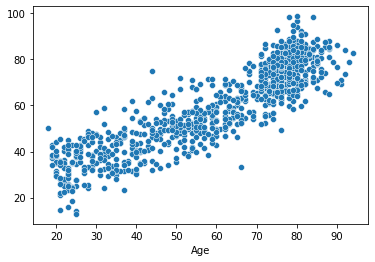

In [ ]:
sns.scatterplot(x=y_test, y=y_pred_test)

In [ ]:
# Decision Tree Regressor

# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=42)

DTR_model = tree.DecisionTreeRegressor(max_depth = 13, min_samples_leaf = 10)
DTR_model.fit(X_train,y_train)
y_train_pred = DTR_model.predict(X_train)
y_pred_test = DTR_model.predict(X_test)

#For debugging purposes, delete later:

DTR_trainmse = np.sqrt(mse(y_train, y_train_pred))
DTR_validmse = np.sqrt(mse(y_test, y_pred_test))
print("training mean square error: {}\nvalidation mean square error: {}".format(DTR_trainmse, DTR_validmse))

training mean square error: 7.122485568407032
validation mean square error: 10.981888277412516


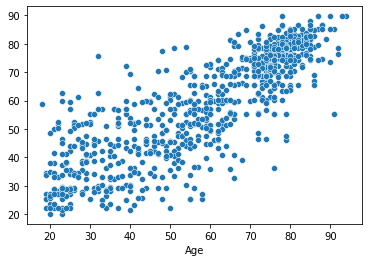

In [ ]:
sns.scatterplot(x=y_test, y=y_pred_test)

In [ ]:
# Kernel Ridge Regression
KR_model = kernel_ridge.KernelRidge()
KR_model.fit(X_train,y_train)

y_pred_test = KR_model.predict(X_test)
y_train_pred = KR_model.predict(X_train)

KR_trainmse = np.sqrt(mse(y_train, y_train_pred))
KR_validmse = np.sqrt(mse(y_test, y_pred_test))
print("training mean square error: {}\nvalidation mean square error: {}".format(KR_trainmse, KR_validmse))

training mean square error: 13.125533118908868
validation mean square error: 13.475495622180835


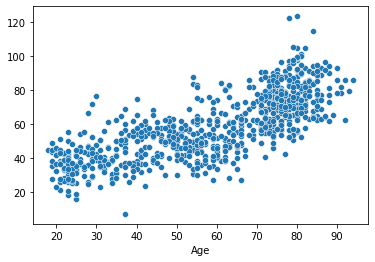

In [ ]:
sns.scatterplot(x=y_test, y=y_pred_test)